In [2]:
# Code from Book: Build Your Own AI Investor
# Damon Lee 2021
# Check out the performance on www.valueinvestingai.com
# Code uses data from the (presumably) nice people at https://simfin.com/. 
# Feel free to fork this code for others to see what can be done with it.
'''
For combining fundamentals financial data from SimFin,
or SimFin+ (https://simfin.com/) without API.
Download Income Statement, Balance Sheet and Cash Flow files,
Place in a directory and give the directory path to the function.
Assumes standard filenames from SimFin.
Returns a DataFrame of the combined result. 
Prints file infos.

Tutorials on SimFin data can be found here:
https://github.com/simfin/simfin-tutorials/blob/master/01_Basics.ipynb
'''

# importing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
from platform import python_version
print('Python version is: ', python_version())

Python version is:  3.11.4


In [3]:
# import simfin package and financial data:
# install using powershell and import:
!pip install simfin
import simfin as sf
from simfin.names import *    # Import the names of Simfin module, so you can access their names without using strings in the 'name' format. 

# Set your API-key for downloading data.
sf.set_api_key('413eeb18-667a-41b6-9ec8-b9af436a70a4')

# Set the local directory where data-files are stored.
sf.set_data_dir('C:/Users/dun81/OneDrive/Documents/Dun II/ET Online/Projects Online/'
'By Software/Programming/Python/Build Your Own AI Investor/SimFin Data')

# Download the data from the SimFin server and load into a Pandas DataFrame.
# This dataset contains all items from the income statement for all companies that belong to the selected market:
df1 = sf.load(dataset='income', variant='annual', market='us',
             parse_dates=[REPORT_DATE, PUBLISH_DATE, RESTATED_DATE])   # this line changes format into dates
# This dataset contains all items from the balance sheet for all companies that belong to the selected market:
df2 = sf.load(dataset='balance', variant='annual', market='us',
             parse_dates=[REPORT_DATE, PUBLISH_DATE, RESTATED_DATE]) 
# This dataset contains all items from the cash flow statement for all companies that belong to the selected market:
df3 = sf.load(dataset='cashflow', variant='annual', market='us',
             parse_dates=[REPORT_DATE, PUBLISH_DATE, RESTATED_DATE])
# This dataset contains all daily share prices.
df4 = sf.load(dataset='shareprices', variant='daily', market='us',
             parse_dates=[DATE])
# Print the first rows of the data.
print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())

Dataset "us-income-annual" on disk (10 days old).
- Loading from disk ... Done!
Dataset "us-balance-annual" on disk (10 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-annual" on disk (10 days old).
- Loading from disk ... Done!
Dataset "us-shareprices-daily" on disk (6 days old).
- Loading from disk ... Done!
  Ticker  SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
0      A     45846      USD         2017            FY  2017-10-31   
1      A     45846      USD         2018            FY  2018-10-31   
2      A     45846      USD         2019            FY  2019-10-31   
3      A     45846      USD         2020            FY  2020-10-31   
4      A     45846      USD         2021            FY  2021-10-31   

  Publish Date Restated Date  Shares (Basic)  Shares (Diluted)  ...  \
0   2017-12-21    2018-12-20     322000000.0       326000000.0  ...   
1   2018-12-20    2020-12-18     321000000.0       325000000.0  ...   
2   2019-12-19    2021-12-17     3140000

In [42]:
# Set the plotting DPI settings to be a bit higher.
plt.rcParams['figure.figsize'] = [7.0, 4.5]     
plt.rcParams['figure.dpi'] = 150

# Create a custom function for merging the data together:
def getXDataMerged():    
    # get info on the shape of the data
    print('Income Statement CSV data is(rows, columns): ',
          df1.shape)
    print('Balance Sheet CSV data is: ',
          df2.shape)
    print('Cash Flow CSV data is: ' ,
          df3.shape)
    
    # Merge the data together
    result = pd.merge(df1, df2, on=['Ticker', 'SimFinId', 'Currency',
                      'Fiscal Year', 'Fiscal Period', 'Report Date', 'Publish Date'], how='outer')    # we force merge on 'outer' even when there's no matching rows
    result = pd.merge(result, df3, on=['Ticker','SimFinId','Currency',
                    'Fiscal Year','Report Date','Publish Date'])        
    print('Merged X data matrix shape is: ', result.shape)
    
    return result

In [43]:
# Use getXDataMerged() to retrieve some data, and then save it to a CSV file named "Annual_Stock_Price_Fundamentals.csv"
X = getXDataMerged()
X.to_csv("Annual_Stock_Price_Fundamentals.csv")

Income Statement CSV data is(rows, columns):  (17185, 28)
Balance Sheet CSV data is:  (17185, 30)
Cash Flow CSV data is:  (17185, 28)
Merged X data matrix shape is:  (34370, 73)


In [6]:
def getYRawData():
    dailySharePrices=df4 
    print('Stock Price data matrix is: ',dailySharePrices.shape)
    return dailySharePrices
# Assign this function to 'd' and test to see if it works:
d = getYRawData()
d[d['Ticker']=='GOOG']

Stock Price data matrix is:  (4871578, 11)


,Ticker,SimFinId,Date,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
0,GOOG,18,2017-10-25,48.42,48.03,48.80,48.67,48.67,NaN,23252120,1.389604e+10
1,GOOG,18,2017-10-26,49.00,48.61,49.38,48.63,48.63,NaN,33217000,1.389604e+10
2,GOOG,18,2017-10-27,50.46,50.41,52.42,50.96,50.96,NaN,102515820,1.389604e+10
3,GOOG,18,2017-10-30,50.70,50.38,51.25,50.86,50.86,NaN,41492380,1.389604e+10
4,GOOG,18,2017-10-31,50.76,50.52,51.20,50.83,50.83,NaN,26499220,1.389604e+10
...,...,...,...,...,...,...,...,...,...,...,...
1254,GOOG,18,2022-10-19,100.70,99.64,101.66,100.29,100.29,NaN,21573686,1.301800e+10
1255,GOOG,18,2022-10-20,100.82,99.97,103.00,100.53,100.53,NaN,25125082,1.301800e+10
1256,GOOG,18,2022-10-21,98.46,98.23,101.62,101.48,101.48,NaN,28988727,1.301800e+10
1257,GOOG,18,2022-10-24,102.09,100.30,103.10,102.97,102.97,NaN,24680831,1.301800e+10


In [7]:
def getYPriceDataNearDate(ticker, date, modifier, dailySharePrices):
    windowDays=5      # The range of days allowed that deviates away from function input. 
    rows = dailySharePrices[
        (dailySharePrices["Date"].between(pd.to_datetime(date)
                                          + pd.Timedelta(days=modifier),
                                          pd.to_datetime(date)
                                          + pd.Timedelta(days=windowDays
                                                         +modifier)
                                         )
        ) & (dailySharePrices["Ticker"]==ticker)]
    # The statement above says the following things: 
        # dailySharePrices["Date"].between(pd.to_datetime(date) chooses the column "Date" from df4 and checks for dates between the following...
            # convert 'date' (an argument in string format) to datetime format.
            # and add a time delta to the date. Value of 'modifier' shifts the date by certain number.
            # again, convert to datetime format, this time, addition of windowDays (defined earlier) + modifier days.
            # finally, in addition, check to see if "Ticker" column matches the input ticker in the function. 
        
    if rows.empty:
        return [ticker, float("NaN"),\
                np.datetime64('NaT'),\
                float("NaN")]
    # Next, we have if rows are empty statement for ticker (in Numpy):
        # return 'NaN' if rows are empty for float numbers
        # return 'NaT' if rows are empty for datetime 64-bit
        # return 'NaN' if rows are empty for float numbers
    else:
        return [ticker, rows.iloc[0]["Open"],\
                rows.iloc[0]["Date"],\
                rows.iloc[0]["Volume"]*rows.iloc[0]["Open"]]
    # Else statement for ticker (indexing using DataFrame in Pandas):
        # select first row and select a column named "Open"
        # then select "Date"
        # then select "Volume" and multiply its value with "Open"
    # Therefore, overall, this code changes the "Date" value to a range of 5 days. And retrieve their 
    #"Ticker", and if it notices that the row is empty, it will give "NaN" or "NaT", and if it's not
    # empty, it will return its "Open", "Date", and "Volume" data multiplied by "Open".

In [8]:
# Check to see if your codes work:

# check the getYPriceDataNearDate() custom function:
print(getYPriceDataNearDate('AAPL', '2019-05-12', 0, d)) 
print(getYPriceDataNearDate('AAPL', '2019-05-12', 30, d))

['AAPL', 46.93, Timestamp('2019-05-13 00:00:00'), 10780876549.56]
['AAPL', 48.72, Timestamp('2019-06-11 00:00:00'), 5248680044.16]


In [9]:
def getYPricesReportDateAndTargetDate(x, d, modifier=365):
    y = [[None]*8 for i in range(len(x))]    # create a blank matrix that is 8 slots in the range of length of x
    whichDateCol='Publish Date'              # assign 'Publish Date' column to 'whichDateCol'
    
    i=0                                      # initialize counter
    for index in range(len(x)):              # create a loop named index in range between 0 and length of x
        y[i]=(getYPriceDataNearDate(x['Ticker'].iloc[index],         # fill 'y' with... 'Ticker' data from specific date for row at 'index' value for DataFrame x...
                                    x[whichDateCol].iloc[index],0,d) # get value in 'Publish Date' column for row at 'index'. Set modifier to 0 (current date). Retrieve stock price data 'd'...  
              +getYPriceDataNearDate(x['Ticker'].iloc[index],        # add to value of 'Ticker', 'Publish Date', in row 'index' value, stock price 'd', and modifier 365 (1 year later)
                                     x[whichDateCol].iloc[index], 
                                     modifier,d))
        i=i+1                                                        # advance the index
    return y                                                         # return value of y

# Overall, the code above is used to get price report based on a specific 'Publish Date' column, both the current date (0), and modified date a year later (365).

In [10]:
# We want to know the performance for each stock, each year, between 10-K report dates.
# takes VERY long time, several hours.
y = getYPricesReportDateAndTargetDate(X, d, 365) # because of lookups in this function.
y = pd.DataFrame(y, columns=['Ticker', 'Open Price', 'Date', 'Volume',\
                             'Ticker2', 'Open Price2', 'Date2', 'Volume2'
                            ])
y.to_csv("Annual_Stock_Price_Performance.csv")
y

,Ticker,Open Price,Date,Volume,Ticker2,Open Price2,Date2,Volume2
0,A,67.51,2017-12-21,1.009366e+08,A,65.22,2018-12-21,3.054318e+08
1,A,66.33,2018-12-20,2.353265e+08,A,84.94,2019-12-20,1.943251e+08
2,A,83.95,2019-12-19,1.423797e+08,A,119.23,2020-12-18,4.664016e+08
3,A,119.23,2020-12-18,4.664016e+08,A,150.76,2021-12-20,3.056217e+08
4,A,150.35,2021-12-17,3.952235e+08,A,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...
17180,ZYXI,4.55,2018-02-28,5.852392e+05,ZYXI,4.51,2019-02-28,2.961627e+05
17181,ZYXI,5.09,2019-02-26,2.683601e+05,ZYXI,11.90,2020-02-26,3.442361e+06
17182,ZYXI,11.25,2020-02-27,4.283404e+06,ZYXI,14.55,2021-02-26,3.741924e+07
17183,ZYXI,16.78,2021-02-25,7.177796e+06,ZYXI,6.37,2022-02-25,3.256204e+06


C:\Users\dun81\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:122: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


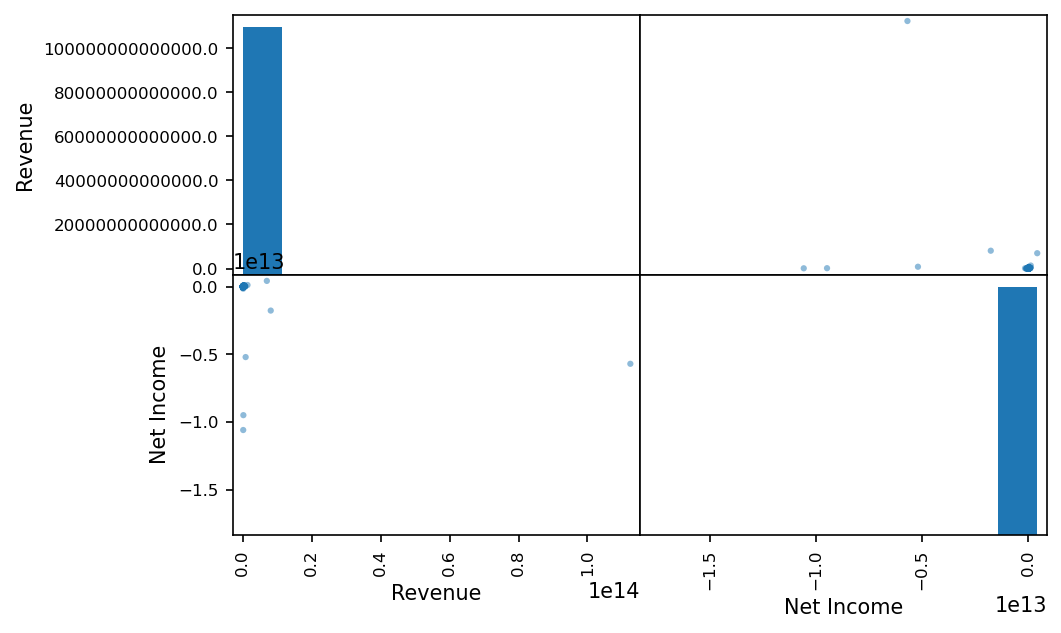

In [44]:
# now remove rows with issues.
X=pd.read_csv("Annual_Stock_Price_Fundamentals.csv", index_col=1)
y=pd.read_csv("Annual_Stock_Price_Performance.csv", index_col=1)

from pandas.plotting import scatter_matrix
attributes=["Revenue","Net Income"]
scatter_matrix(X[attributes]);

In [64]:
# Find out things about Y data
print("y Shape:", y.shape)
print("X Shape:", X.shape)

y Shape: (17185, 8)
X Shape: (34370, 73)
